For this dataset, the target variable has two values, 0 and 1.
0 means malignant and 1 means benign

In [ ]:
#Importing necessary fundamental libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [ ]:
#Importing dataset from sklearn library
from sklearn.datasets import load_breast_cancer
#Import classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import StandardScaler library
from sklearn.preprocessing import StandardScaler
# Import libraries for getting model metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score

In [ ]:
#Loading dataset from library as a Numpy array
raw_data = load_breast_cancer()
raw_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
#Creating dataframe from Numpy array
data_df = pd.DataFrame(raw_data.data,columns =[raw_data.feature_names])
data_target = pd.DataFrame(raw_data.target,index=data_df.index, columns=["target"])
data_df = pd.concat([data_df,data_target],axis=1)
data_df

,"(mean radius,)","(mean texture,)","(mean perimeter,)","(mean area,)","(mean smoothness,)","(mean compactness,)","(mean concavity,)","(mean concave points,)","(mean symmetry,)","(mean fractal dimension,)","(radius error,)","(texture error,)","(perimeter error,)","(area error,)","(smoothness error,)","(compactness error,)","(concavity error,)","(concave points error,)","(symmetry error,)","(fractal dimension error,)","(worst radius,)","(worst texture,)","(worst perimeter,)","(worst area,)","(worst smoothness,)","(worst compactness,)","(worst concavity,)","(worst concave points,)","(worst symmetry,)","(worst fractal dimension,)",target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
# Gives a brief overview of the dataframe
data_df.head()

,"(mean radius,)","(mean texture,)","(mean perimeter,)","(mean area,)","(mean smoothness,)","(mean compactness,)","(mean concavity,)","(mean concave points,)","(mean symmetry,)","(mean fractal dimension,)","(radius error,)","(texture error,)","(perimeter error,)","(area error,)","(smoothness error,)","(compactness error,)","(concavity error,)","(concave points error,)","(symmetry error,)","(fractal dimension error,)","(worst radius,)","(worst texture,)","(worst perimeter,)","(worst area,)","(worst smoothness,)","(worst compactness,)","(worst concavity,)","(worst concave points,)","(worst symmetry,)","(worst fractal dimension,)",target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [ ]:
# Shows a statistical breakdown of each numerical column in the dataframe
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
"(mean radius,)",569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
"(mean texture,)",569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
"(mean perimeter,)",569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
"(mean area,)",569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
"(mean smoothness,)",569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
"(mean compactness,)",569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
"(mean concavity,)",569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
"(mean concave points,)",569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
"(mean symmetry,)",569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
"(mean fractal dimension,)",569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
# Checks if there are any null values in the dataframe
data_df.isnull().sum()

(mean radius,)                0
(mean texture,)               0
(mean perimeter,)             0
(mean area,)                  0
(mean smoothness,)            0
(mean compactness,)           0
(mean concavity,)             0
(mean concave points,)        0
(mean symmetry,)              0
(mean fractal dimension,)     0
(radius error,)               0
(texture error,)              0
(perimeter error,)            0
(area error,)                 0
(smoothness error,)           0
(compactness error,)          0
(concavity error,)            0
(concave points error,)       0
(symmetry error,)             0
(fractal dimension error,)    0
(worst radius,)               0
(worst texture,)              0
(worst perimeter,)            0
(worst area,)                 0
(worst smoothness,)           0
(worst compactness,)          0
(worst concavity,)            0
(worst concave points,)       0
(worst symmetry,)             0
(worst fractal dimension,)    0
target                        0
dtype: i

In [ ]:
data_df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

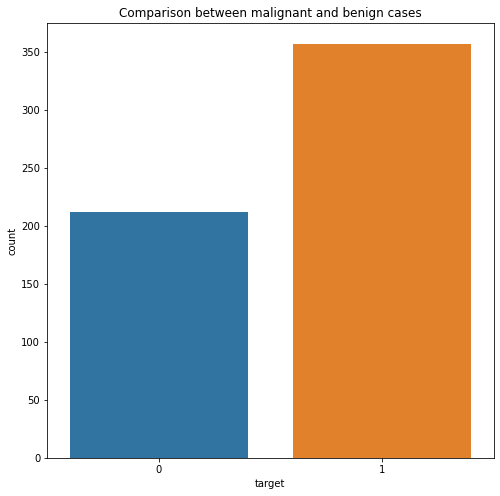

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Comparison between malignant and benign cases')
plt.xlabel('Target')
plt.ylabel('Count of cases')
sns.countplot(x='target',data=data_df)

The next section is going to have the model using kNN.

In [ ]:
#Defining x and y variables that will be used to get training and testing datasets
x = data_df.iloc[:,0:29]
y = data_df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [ ]:
#Splitting x and y variables into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# Scaling the data using StandardScaler to standardize all values in the x_train and x_test to fit between 0 and 1
scaler = StandardScaler()
scaler.fit(x)
scaler.transform(x_train)
scaler.transform(x_test)

array([[-1.80840125,  1.22179204, -1.81438851, ..., -1.30583065,
        -1.74506282, -0.04813821],
       [-0.79731071,  1.81286709, -0.83241413, ..., -0.78338034,
        -1.42789279, -0.08372939],
       [ 1.75597692,  1.80821295,  1.68595471, ...,  0.51147126,
         0.83889076,  0.40484036],
       ...,
       [-1.03588263,  0.13272462, -1.04001274, ..., -0.73924312,
        -0.71939922, -0.02872485],
       [ 0.03769103, -0.26054972, -0.03085284, ..., -0.55501822,
        -0.59850004, -0.42831666],
       [ 0.117215  ,  1.91991217,  0.19610517, ...,  2.06490938,
         0.86173065,  2.13101227]])

In [ ]:
# Create kNN classifier object
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
# Train the kNN model with the train data
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Predicts using the x_test data
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0])

In [ ]:
# Dataframe showing the actual test data compared to the predicted data
comparison_df = pd.DataFrame({
    'Predicted y': y_pred,
    'Actual y test': y_test
})
comparison_df

,Predicted y,Actual y test
568,1,1
231,1,1
260,0,0
178,1,1
154,1,1
...,...,...
385,1,0
198,0,0
245,1,1
298,0,1


In [ ]:
# Confusion matrix
confusion_matrix(y_test,y_pred,labels=[0,1])

array([[39,  9],
       [ 3, 63]])

In [ ]:
# f1 Score
f1_score(y_test,y_pred,labels=1)

0.9130434782608695

In [ ]:
# Accuracy
accuracy_score(y_test,y_pred)

0.8947368421052632

In [ ]:
# Recall
recall_score(y_test,y_pred,pos_label=0)

0.8125